In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
import pickle
import sys
%matplotlib inline

In [13]:
# https://classic.fec.gov/finance/disclosure/ftpdet.shtml#a2017_2018

cc_df = pd.read_csv('data/taiwan_cc/default_of_credit_card_clients.csv', index_col='ID')
cc_df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


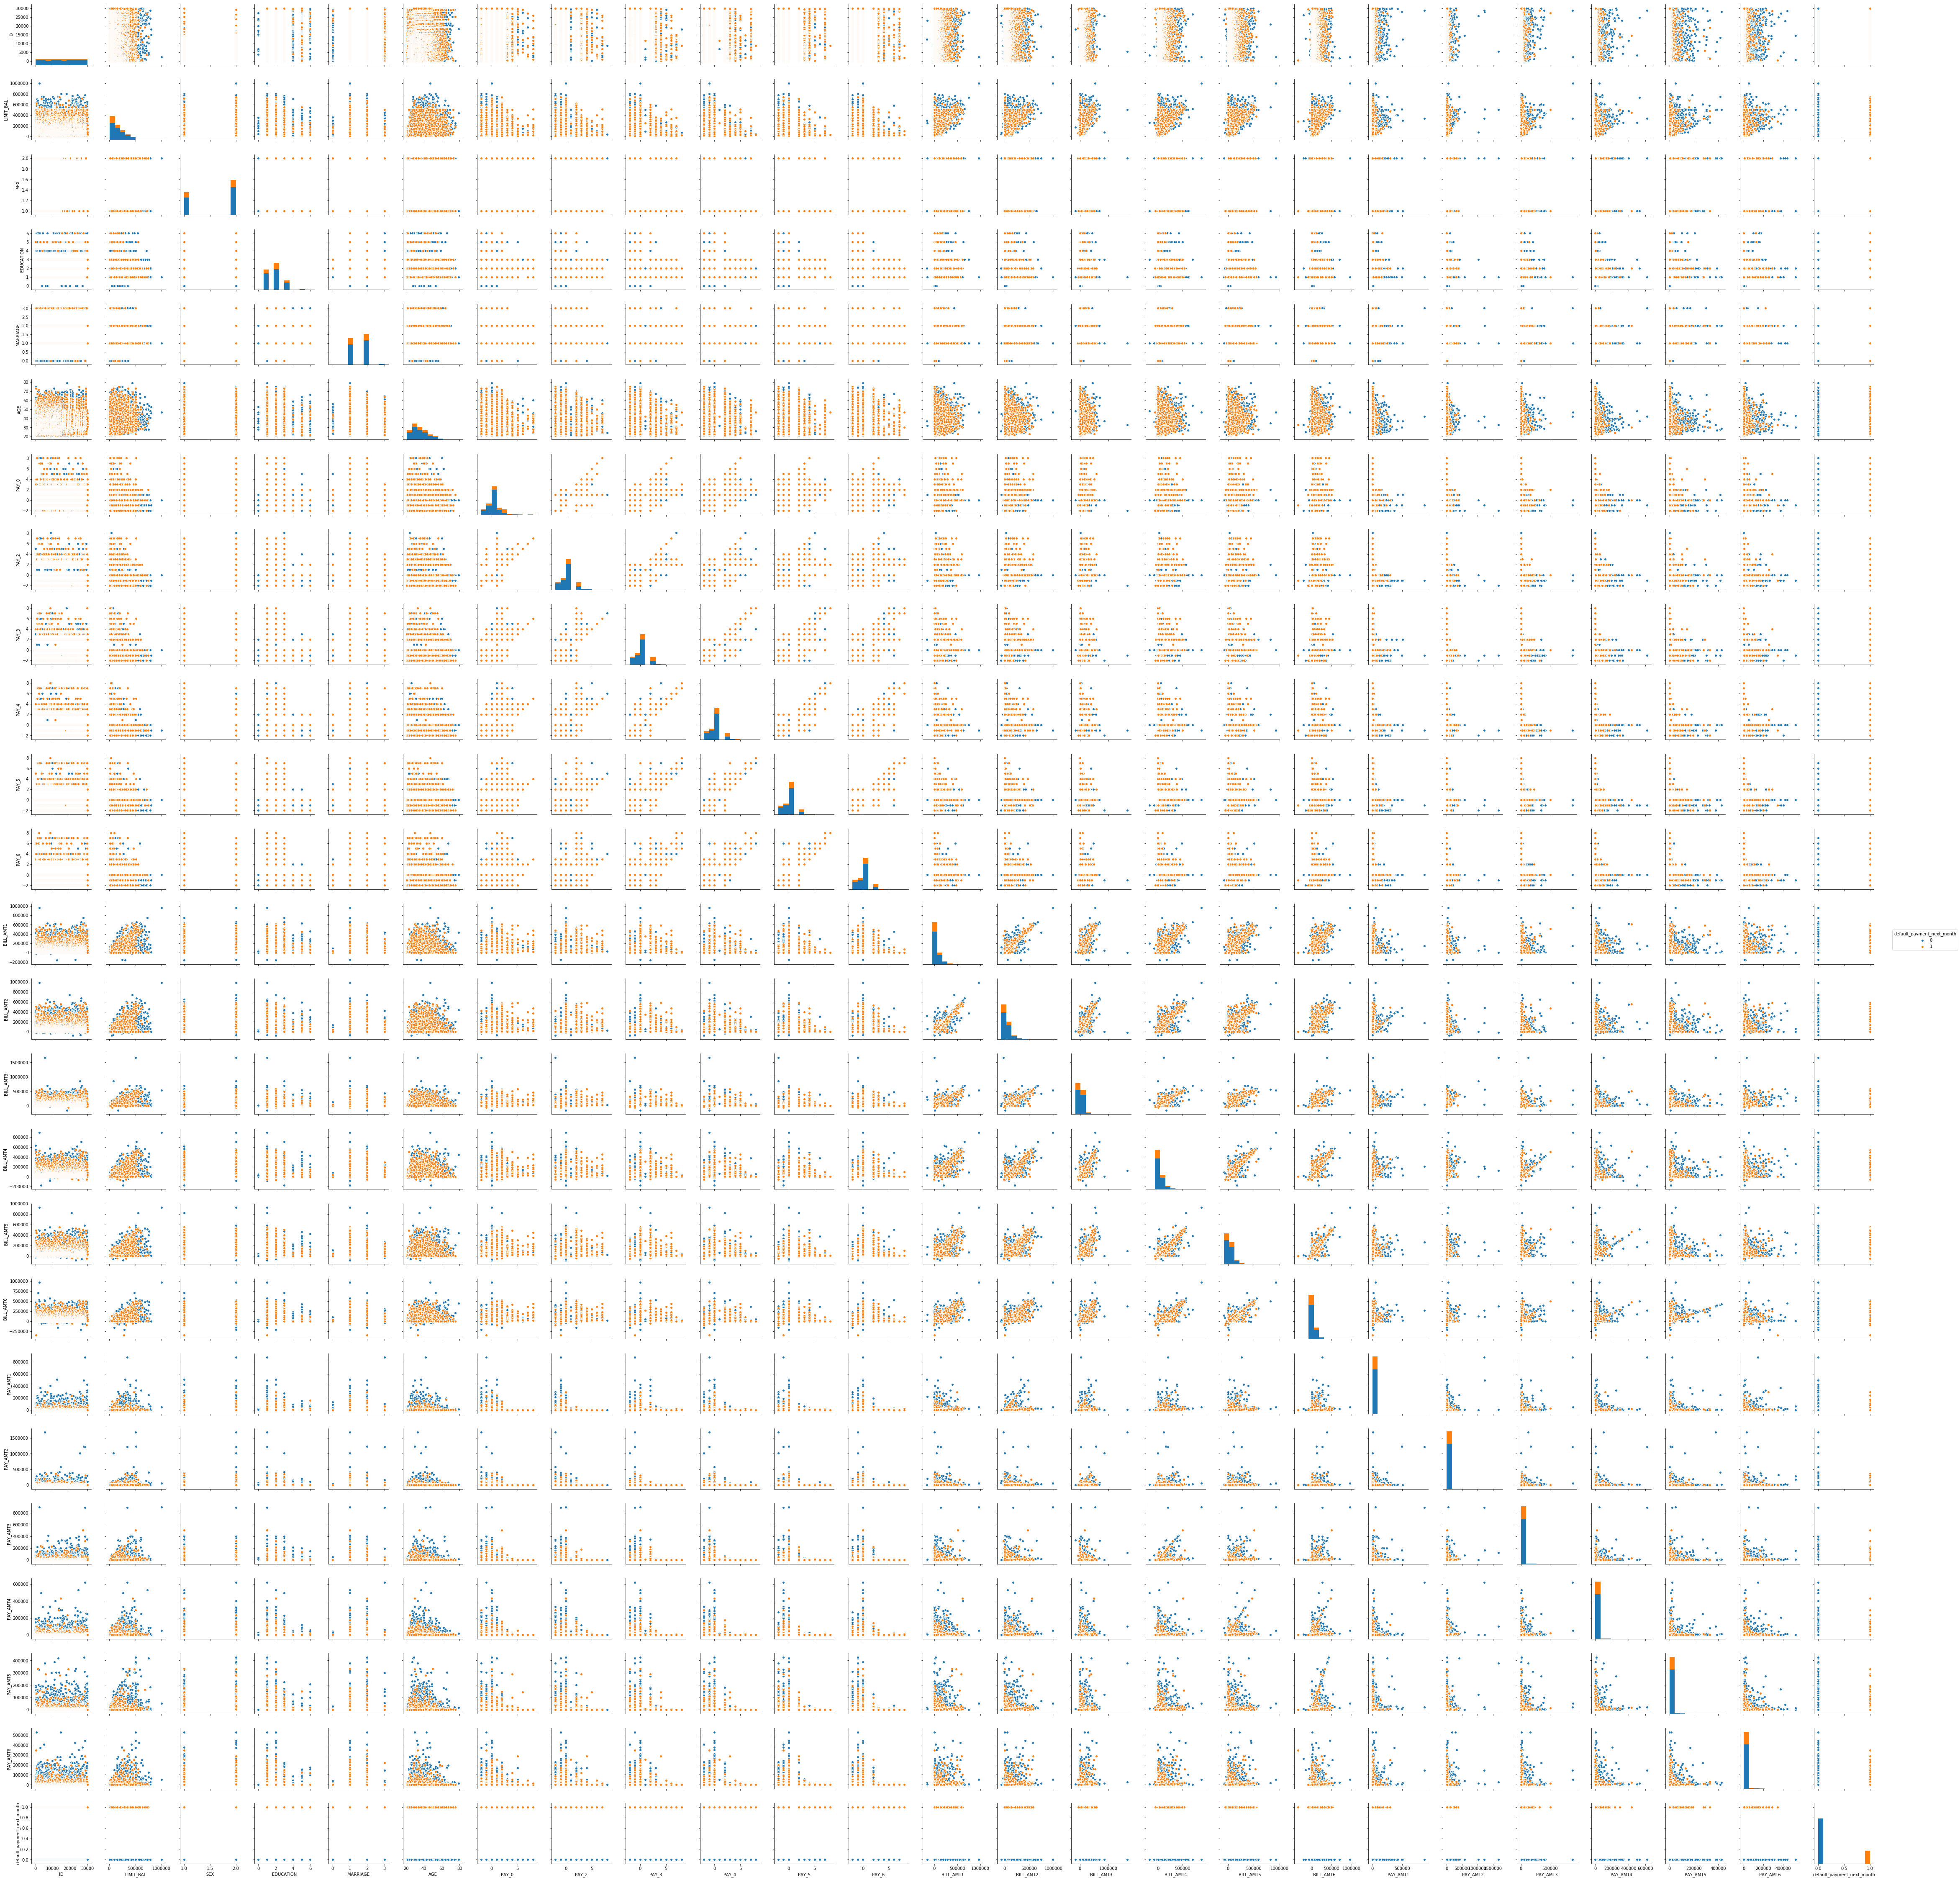

In [3]:
g = sns.pairplot(cc_df, hue='default_payment_next_month')

In [9]:
with open('data/taiwan_cc/cc_pairplot.pickle', 'xb') as f:
    pickle.dump(g, f)
    
with open('data/taiwan_cc/cc_pairplot.pickle', 'rb') as f:
    g = pickle.load(f)

In [18]:
# This produces a rather attractive scatterplot 
# df:         a dataframe that contains featureA, featureB, and class_variable
# featureA:   a String representation of one of the columns in DF
# featureB:   a String representation of another of the columns in DF
# class_var:  a String representation of one the class labels column in DF
def feature_compare(df, featureA, featureB, class_var='default_payment_next_month'):
    g = sns.FacetGrid(data=df[[class_var, featureA, featureB]],hue=class_var,
                      hue_order=[0,1], aspect=1, size=5)
    fig = g.fig
    g.map(plt.scatter, featureA, featureB).add_legend()
    fig.suptitle(featureA + ' VS. ' + featureB)

In [12]:
cc_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

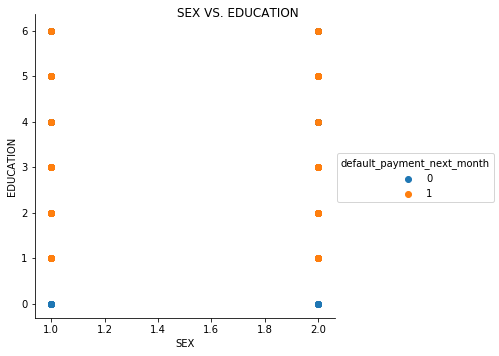

In [19]:
feature_compare(cc_df, 'SEX', 'EDUCATION')

In [8]:
help(pickle)
# help(open)

Help on module pickle:

NAME
    pickle - Create portable serialized representations of Python objects.

DESCRIPTION
    See module copyreg for a mechanism for registering custom picklers.
    See module pickletools source for extensive comments.
    
    Classes:
    
        Pickler
        Unpickler
    
    Functions:
    
        dump(object, file)
        dumps(object) -> string
        load(file) -> object
        loads(string) -> object
    
    Misc variables:
    
        __version__
        format_version
        compatible_formats

CLASSES
    builtins.Exception(builtins.BaseException)
        _pickle.PickleError
            _pickle.PicklingError
            _pickle.UnpicklingError
    builtins.object
        _pickle.Pickler
        _pickle.Unpickler
    
    class PickleError(builtins.Exception)
     |  Common base class for all non-exit exceptions.
     |  
     |  Method resolution order:
     |      PickleError
     |      builtins.Exception
     |      builtins.BaseExc